In [2]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import pandas as pd
# import time
%matplotlib inline

In [3]:
plt.rcParams["font.family"] = 'serif'
plt.rcParams['mathtext.fontset'] = 'dejavuserif'

data = pd.read_csv('June18,2024(0-530,15Bar,380A).xlsx - Slow.csv')
data

,Time,Chamber Pressure [Bar],N2 Pressure [Bar],Leakage Rate [Bar/Min],Wall Temp [C],Coolant In Temp [C],Coolant Out Temp [C],Injector Temp [C],Internal Temp [C],Pressure Temp [C],Rate of Temp Change [C/min],Heater On
0,06/18/2024 09:58:09.928 AM,-0.764735,0.348571,-45.385296,21.601864,21.631462,21.526960,21.691198,18.442898,21.554379,-0.001942,0
1,06/18/2024 10:08:29.038 AM,-0.798182,0.319902,-2.948760,22.034721,40.432274,40.008648,36.198757,22.223206,21.648180,0.268810,0
2,06/18/2024 10:08:30.089 AM,-0.793404,0.353349,-1.076383,22.038523,40.454670,40.041363,36.224796,22.227007,21.646029,0.247922,0
3,06/18/2024 10:08:30.989 AM,-0.774292,0.367683,-0.326924,22.039339,40.464714,40.053539,36.240753,22.227867,21.648151,0.130370,0
4,06/18/2024 10:08:32.038 AM,-0.791015,0.346182,0.104219,22.041611,40.495552,40.079414,36.266350,22.229141,21.647802,0.115663,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7271,06/18/2024 12:09:39.088 PM,-0.736066,0.336625,0.039922,52.912308,31.482752,24.009064,39.878738,52.996986,28.593151,-0.601458,0
7272,06/18/2024 12:09:39.989 PM,-0.757568,0.360515,0.059431,52.901237,31.479549,24.003860,39.873783,52.984116,28.590082,-0.674283,0
7273,06/18/2024 12:09:41.038 PM,-0.798182,0.367683,0.067286,52.889275,31.475618,24.001886,39.866322,52.973976,28.589256,-0.755553,0
7274,06/18/2024 12:09:42.089 PM,-0.781459,0.350960,0.066157,52.877434,31.472528,23.997335,39.860054,52.967003,28.584478,-0.590299,0


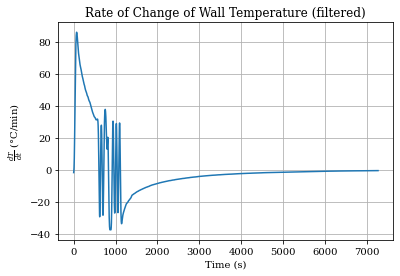

In [7]:
fs = 1 # slow sampling freq (Hz)
fc = 1/60 # cutoff freq (Hz)
Wn = fc / (fs / 2) # normalize freq
N = 2
b, a = signal.butter(N, Wn, 'low')
dTdt_filtered = signal.filtfilt(b, a, data['Rate of Temp Change [C/min]'])

timeobj = np.arange(0, len(data['Time']), 1)
plt.plot(timeobj, dTdt_filtered)
plt.title('Rate of Change of Wall Temperature (filtered)')
plt.xlabel('Time (s)')
plt.ylabel(r'$\frac{dT}{dt}$ (°C/min)')
plt.grid()

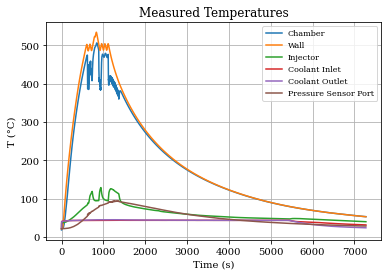

In [8]:
plt.plot(timeobj, data['Internal Temp [C]'], label='Chamber')
plt.plot(timeobj, data['Wall Temp [C]'], label='Wall')
plt.plot(timeobj, data['Injector Temp [C]'], label='Injector')
plt.plot(timeobj, data['Coolant In Temp [C]'], label='Coolant Inlet')
plt.plot(timeobj, data['Coolant Out Temp [C]'], label='Coolant Outlet')
plt.plot(timeobj, data['Pressure Temp [C]'], label='Pressure Sensor Port')
plt.title('Measured Temperatures')
plt.xlabel('Time (s)')
plt.ylabel('T (°C)')
plt.legend(fontsize=8)
plt.grid()

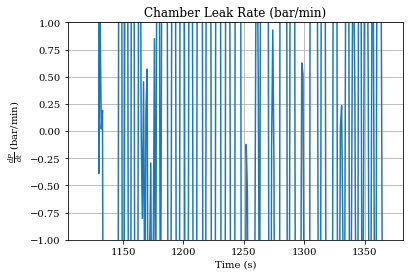

In [15]:
plt.plot(timeobj[1117:1370], data['Leakage Rate [Bar/Min]'][1117:1370])
plt.title('Chamber Leak Rate (bar/min)')
plt.xlabel('Time (s)')
plt.ylabel(r'$\frac{dP}{dt}$ (bar/min)')
plt.ylim(-1, 1)
plt.grid()

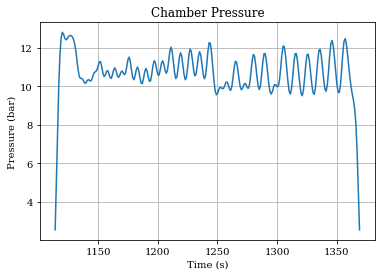

In [18]:
fs = 1 # slow sampling freq (Hz)
fc = 1/10 # cutoff freq (Hz)
Wn = fc / (fs / 2) # normalize freq
N = 2
b, a = signal.butter(N, Wn, 'low')
P_filtered = signal.filtfilt(b, a, data['Chamber Pressure [Bar]'])

plt.plot(timeobj[1114:1370], P_filtered[1114:1370])
plt.title('Chamber Pressure')
plt.xlabel('Time (s)')
plt.ylabel('Pressure (bar)')
plt.grid()

In [19]:
timeobj[1249]-timeobj[1243]

6

In [33]:
(P_filtered[1243]-P_filtered[1249])/(timeobj[1249]-timeobj[1243])

0.45299639734493863